# CP4 - Visualização de Dados

## Integrantes

*   **RM 558843** - Laura de Oliveira Cintra

*   **RM 558832** - Maria Eduarda Alves da Paixão

*   **RM 554456** - Vinícius Saes de Souza

### Objetivo

Exploraremos o dataset **Household Electric Power Consumption** que contém medições do consumo de energia elétrica em uma residência, coletadas entre os anos de 2006 e 2010. Os dados foram registrados em intervalos de um minuto.

##*Importação* *dos pacotes*

In [1]:
import pandas as pd

##*Criação do dataframe com base no arquivo do dataset*

In [2]:
dados = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)

## *Verificando informações do dataset*

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


# **EXERCÍCIOS**

#### `1. Carregue o dataset e exiba as 10 primeiras linhas.`

In [4]:
dados.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


####`2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.`

In [5]:
# Explique a diferença entre as variáveis Global_active_power e Global_reactive_power
dados['Global_active_power'].head(5)

,Global_active_power
0,4.216
1,5.360
2,5.374
3,5.388
4,3.666


In [6]:
dados['Global_active_power'].head(5)

,Global_active_power
0,4.216
1,5.360
2,5.374
3,5.388
4,3.666


**Global_active_power**: É a potência efetivamente usada pelos aparelhos para realizar trabalho, como gerar luz, calor ou movimento. É medida em quilowatts (kW).

**Global_reactive_power**: É a potência que não realiza trabalho útil, mas é necessária para manter o funcionamento de equipamentos, criando campos elétricos e magnéticos. É medida em quilovolt-amperes reativos (kVAr).

####`3. Verifique se existem valores ausentes no dataset Quantifique-os.`

In [7]:
dados.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


existem 25979 valores nulos no dataset.

##### *Excluindo dados faltantes*

In [8]:
dados1 = dados.dropna()

In [9]:
dados1.shape

(2049280, 9)

####```4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente.```





In [10]:
# convertendo dado categorico para datetime
dados['Date'] = pd.to_datetime(dados['Date'])

/tmp/ipython-input-3815306977.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dados['Date'] = pd.to_datetime(dados['Date'])


In [11]:
#verificando conversão
dados['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2075259 entries, 0 to 2075258
Series name: Date
Non-Null Count    Dtype         
--------------    -----         
2075259 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.8 MB


In [12]:
# convertendo dado categorico para datetime

# 1° importando o módulo 'locale' para configurar a localização do sistema
import locale

# Definindo a localização para 'en_US.utf8', garantindo que os nomes dos dias fiquem em inglês
locale.setlocale(locale.LC_TIME, 'en_US.utf8')

'en_US.utf8'

In [13]:
# criando uma nova coluna chamada 'Day_Week' com o nome do dia da semana correspondente à coluna 'Date'
# o método .dt acessa atributos de datas, e .day_name() retorna o nome do dia
dados['Day_Week'] = dados['Date'].dt.day_name()

In [14]:
# verificando a nova criação
dados.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_Week
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,Saturday


####`5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.`

In [15]:
# 1 ° converter a coluna Global_active_power para numérico
dados['Global_active_power'] = pd.to_numeric(dados['Global_active_power'], errors='coerce')

# 2° filtrar os dados do ano de 2007
dados_2007 = dados[dados['Date'].dt.year == 2007]

# 3° agrupar por dia (ignorando a hora) e calcular a média diária
media_diaria = dados_2007.groupby(dados_2007['Date'].dt.date)['Global_active_power'].mean()

print(media_diaria.head())


Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
Name: Global_active_power, dtype: float64


####`6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.`

In [16]:
# importando a biblioteca
import matplotlib.pyplot as plt

In [17]:
# 1° criar uma coluna datetime combinando Date + Time
dados_2007['DateTime'] = pd.to_datetime(dados_2007['Date'].astype(str) + ' ' + dados_2007['Time'])
dados['DateTime'] = pd.to_datetime(dados['Date'].astype(str) + ' ' + dados['Time'])

/tmp/ipython-input-3713364339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_2007['DateTime'] = pd.to_datetime(dados_2007['Date'].astype(str) + ' ' + dados_2007['Time'])


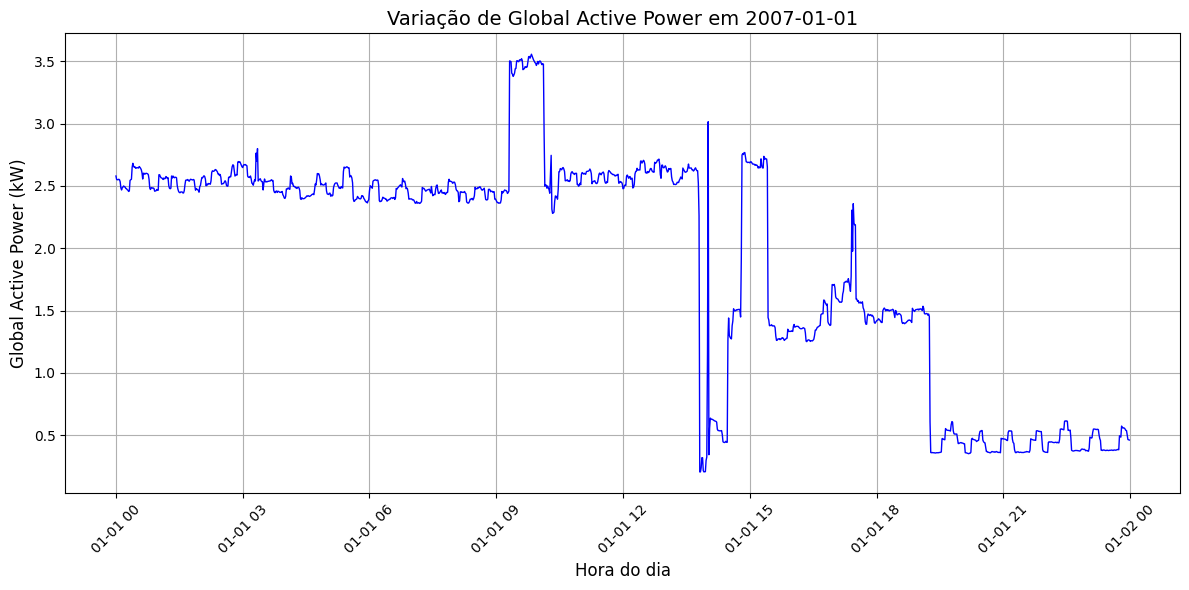

In [18]:
# 2° filtrar o dia escolhido
dia_escolhido = '2007-01-01'
dados_dia = dados_2007[dados_2007['DateTime'].dt.date == pd.to_datetime(dia_escolhido).date()]

# 3° plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(dados_dia['DateTime'], dados_dia['Global_active_power'], color='blue', linewidth=1)

plt.title(f'Variação de Global Active Power em {dia_escolhido}', fontsize=14)
plt.xlabel('Hora do dia', fontsize=12)
plt.ylabel('Global Active Power (kW)', fontsize=12)

# Melhorando os rótulos do eixo X
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

####`7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?`

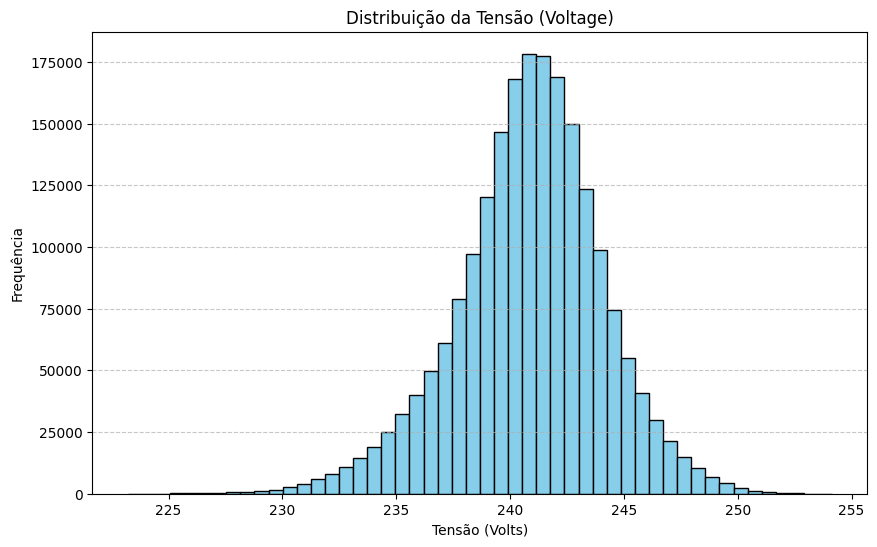

In [19]:
# 1° remove valores nulos e converte para float, caso necessário
dados['Voltage'] = pd.to_numeric(dados['Voltage'], errors='coerce')
dados = dados.dropna(subset=['Voltage'])

# plotando histograma
plt.figure(figsize=(10, 6))
plt.hist(dados['Voltage'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuição da Tensão (Voltage)')
plt.xlabel('Tensão (Volts)')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

O histograma da variável Voltage mostra uma distribuição aproximadamente normal, concentrada principalmente entre 238V e 245V, com pico em torno de 240V. Isso indica que a tensão se mantém estável na maior parte do tempo, variando pouco em relação ao valor central. Há poucos casos de valores mais baixos ou mais altos, o que aparece como as “caudas” da distribuição.

####`8. Calcule o consumo médio por mês em todo o período disponível no dataset.`

In [20]:
# 1° total de consumo por mês (ano+mês)
consumo_mensal = dados.groupby(dados['DateTime'].dt.to_period("M"))['Global_active_power'].sum()

# 2° consumo médio mensal em todo o período
consumo_medio = consumo_mensal.mean()
print(f"Consumo médio mensal: {consumo_medio:.2f} kW")


Consumo médio mensal: 46604.68 kW


####`9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).`

In [21]:
# 1° agrupa por dia (ignorando horas e minutos)
consumo_diario = dados.groupby(dados['DateTime'].dt.date)['Global_active_power'].sum()

# 2° identifica o dia com maior consumo
dia_max = consumo_diario.idxmax()
valor_max = consumo_diario.max()

print(f"Dia com maior consumo: {dia_max} -> {valor_max:.2f} kW")

Dia com maior consumo: 2006-12-23 -> 4773.39 kW


####`10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.`

In [22]:
# 1° definir os dias do fim de semana
fins_semana = ['Saturday', 'Sunday']

# 2° criar coluna "Type_Day" para marcar se é semana ou final de semana
dados['Type_Day'] = dados['Day_Week'].apply(lambda x: 'Fim de Semana' if x in fins_semana else 'Dia de Semana')

# 3° calcular a média de consumo por tipo de dia
# groupby -> agrupa os dados com base de uma coluna ou mais
consumo_medio = dados.groupby('Type_Day')['Global_active_power'].mean()

print(consumo_medio)


Type_Day
Dia de Semana    1.035472
Fim de Semana    1.234232
Name: Global_active_power, dtype: float64


####`11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.`

In [23]:
# 1° converte colunas que estão como object para float
for col in ['Global_reactive_power', 'Global_intensity']:
    dados[col] = pd.to_numeric(dados[col], errors='coerce')

# 2° tudo em numeric, entao agora -> calcular a correlação entre as variáveis
corr = dados[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr()

print(corr)

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


As variáveis Global_active_power e Global_intensity apresentam correlação muito forte, pois estão diretamente relacionadas. A Global_reactive_power tem correlação fraca com as demais, enquanto a Voltage mostra correlação negativa moderada com a potência e a intensidade, indicando que quando o consumo aumenta a tensão tende a cair.

####`12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3.`

In [24]:
# 1° converter as colunas para numéricas
for col in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    dados[col] = pd.to_numeric(dados[col], errors='coerce')

# 2° criar a nova variável com a soma
dados['Total_Sub_metering'] = dados['Sub_metering_1'] + dados['Sub_metering_2'] + dados['Sub_metering_3']

In [25]:
# verificando as primeiras linhas com o resultado da soma
dados.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_Week,DateTime,Type_Day,Total_Sub_metering
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday,2006-12-16 17:24:00,Fim de Semana,18.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday,2006-12-16 17:25:00,Fim de Semana,17.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday,2006-12-16 17:26:00,Fim de Semana,19.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday,2006-12-16 17:27:00,Fim de Semana,18.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday,2006-12-16 17:28:00,Fim de Semana,18.0


####`13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.`

In [26]:
# 1° média de Global_active_power
media_global = dados['Global_active_power'].mean()

print(f"Média de Global_active_power: {media_global:.2f} ")

# 2° agrupar Total_Sub_metering por mês (ano+mês)
total_sub_por_mes = dados.groupby(dados['DateTime'].dt.to_period("M"))['Total_Sub_metering'].sum()

# 3° filtrar meses que ultrapassam a média
meses_acima_media = total_sub_por_mes[total_sub_por_mes > media_global]

print("Meses em que Total_Sub_metering ultrapassa a média de Global_active_power:")
print(meses_acima_media)


Média de Global_active_power: 1.09 
Meses em que Total_Sub_metering ultrapassa a média de Global_active_power:
DateTime
2006-12    239123.0
2007-01    465285.0
2007-02    382462.0
2007-03    455892.0
2007-04    269998.0
2007-05    377317.0
2007-06    318462.0
2007-07    253600.0
2007-08    311404.0
2007-09    354493.0
2007-10    387212.0
2007-11    424179.0
2007-12    519444.0
2008-01    436847.0
2008-02    352756.0
2008-03    422057.0
2008-04    413629.0
2008-05    402611.0
2008-06    422280.0
2008-07    318957.0
2008-08    105802.0
2008-09    381248.0
2008-10    383208.0
2008-11    394569.0
2008-12    391912.0
2009-01    477209.0
2009-02    393948.0
2009-03    441769.0
2009-04    414947.0
2009-05    404717.0
2009-06    321132.0
2009-07    248690.0
2009-08    264304.0
2009-09    394293.0
2009-10    435962.0
2009-11    449447.0
2009-12    495200.0
2010-01    506368.0
2010-02    514572.0
2010-03    420313.0
2010-04    410763.0
2010-05    465108.0
2010-06    420356.0
2010-07    244938.0


####`14. Faça um gráfico de série temporal do Voltage para o ano de 2008.`

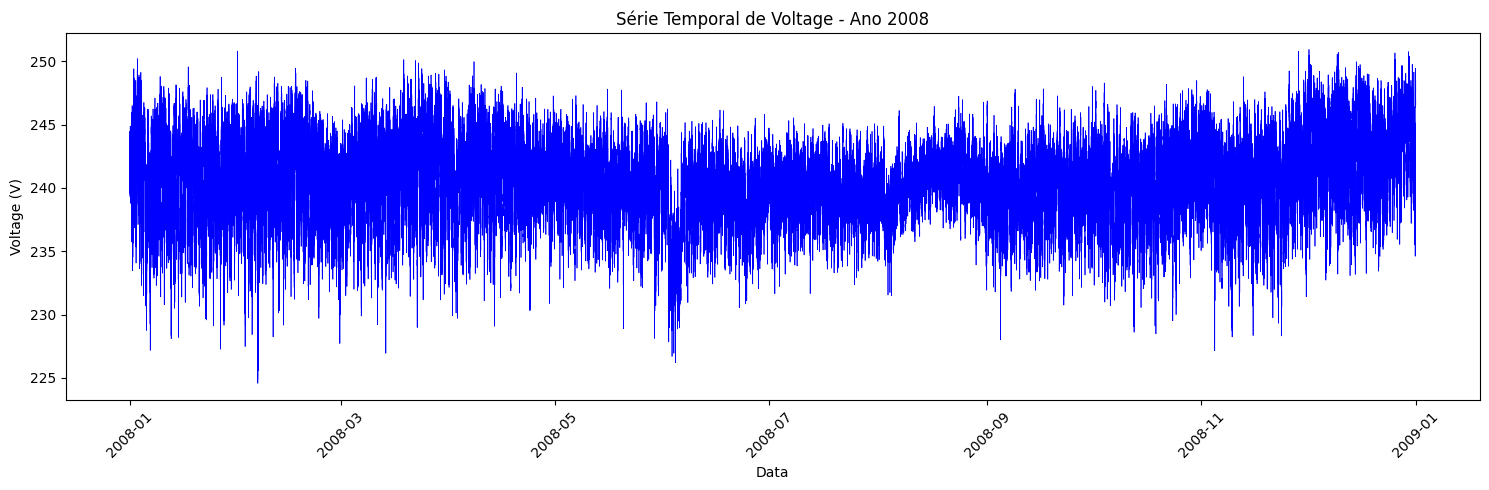

In [27]:
# 1° filtrar apenas o ano de 2008
dados_2008 = dados[dados['DateTime'].dt.year == 2008]

# 2° plotar o gráfico de série temporal
plt.figure(figsize=(15,5))
plt.plot(dados_2008['DateTime'], dados_2008['Voltage'], color='blue', linewidth=0.5)
plt.title('Série Temporal de Voltage - Ano 2008')
plt.xlabel('Data')
plt.ylabel('Voltage (V)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# verificando anos presentes no dataset
print(dados['DateTime'].dt.year.value_counts())

DateTime
2008    526905
2007    521669
2009    521320
2010    457394
2006     21992
Name: count, dtype: int64


####`15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).`

In [29]:
# 1° definir função para classificar a estação
def estacao_correspondente_ao_mes(mes):
    if mes in [6, 7, 8]:
        return 'Verão'
    elif mes in [12, 1, 2]:
        return 'Inverno'
    else:
        return 'Outras'

# 2° criar coluna com a estação
dados['Season'] = dados['DateTime'].dt.month.apply(estacao_correspondente_ao_mes)

# 3° calcular consumo médio por estação (somente verão e inverno)
consumo_estacoes = dados[dados['Season'].isin(['Verão','Inverno'])] \
                   .groupby('Season')['Global_active_power'].mean()

print(consumo_estacoes)


Season
Inverno    1.417623
Verão      0.726682
Name: Global_active_power, dtype: float64


####`16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.`

Estatísticas da base completa:
count    2.049280e+06
mean     1.091615e+00
std      1.057294e+00
min      7.600000e-02
25%      3.080000e-01
50%      6.020000e-01
75%      1.528000e+00
max      1.112200e+01
Name: Global_active_power, dtype: float64

Estatísticas da amostra 1%:
count    20493.000000
mean         1.100869
std          1.059972
min          0.078000
25%          0.312000
50%          0.634000
75%          1.536000
max          8.540000
Name: Global_active_power, dtype: float64


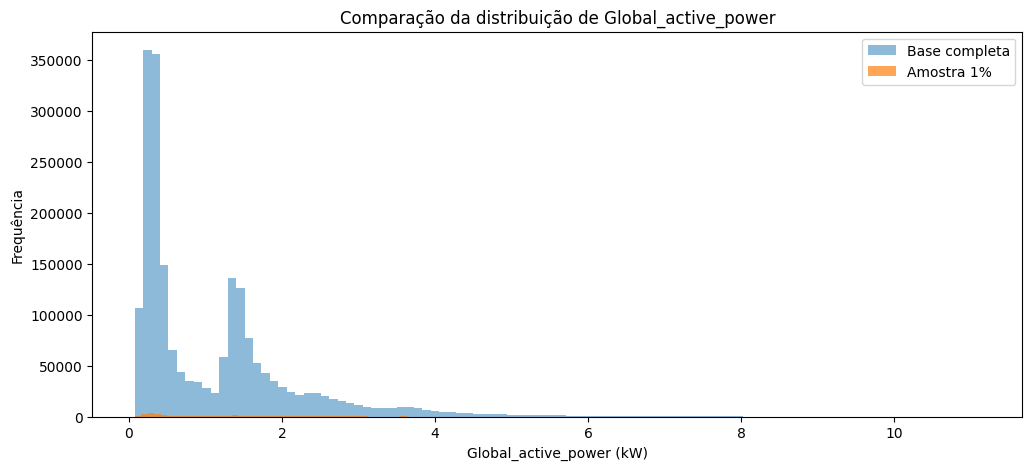

In [30]:
# 1° separar 1% dos dados aleatoriamente
amostra = dados.sample(frac=0.01, random_state=42)

# 2° estatísticas básicas
print("Estatísticas da base completa:")
print(dados['Global_active_power'].describe())
print("\nEstatísticas da amostra 1%:")
print(amostra['Global_active_power'].describe())

# 3° plotar histogramas para comparação e melhor visualização
plt.figure(figsize=(12,5))

plt.hist(dados['Global_active_power'], bins=100, alpha=0.5, label='Base completa')
plt.hist(amostra['Global_active_power'], bins=100, alpha=0.7, label='Amostra 1%')
plt.xlabel('Global_active_power (kW)')
plt.ylabel('Frequência')
plt.title('Comparação da distribuição de Global_active_power')
plt.legend()
plt.show()

A amostra aleatória de 1% apresenta estatísticas muito próximas da base completa, e o gráfico mostra que a distribuição de Global_active_power é praticamente idêntica, sem diferenças perceptíveis.

####`17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.`

In [31]:
# importando biblioteca
from sklearn.preprocessing import MinMaxScaler

In [32]:
# 1° selecionar colunas numéricas principais
cols_numericas = [
    'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering'
]

# 2° criar scaler
# O MinMaxScaler() é uma ferramenta que normaliza os dados, transformando os valores de uma coluna para ficarem entre 0 e 1.
scaler = MinMaxScaler()

# 3° aplicar Min-Max Scaling
dados_scaled = dados.copy()
dados_scaled[cols_numericas] = scaler.fit_transform(dados[cols_numericas])

print(dados_scaled[cols_numericas].head())

   Global_active_power  Global_reactive_power   Voltage  Global_intensity  \
0             0.374796               0.300719  0.376090          0.377593   
1             0.478363               0.313669  0.336995          0.473029   
2             0.479631               0.358273  0.326010          0.473029   
3             0.480898               0.361151  0.340549          0.473029   
4             0.325005               0.379856  0.403231          0.323651   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  Total_Sub_metering  
0             0.0          0.0125        0.548387            0.134328  
1             0.0          0.0125        0.516129            0.126866  
2             0.0          0.0250        0.548387            0.141791  
3             0.0          0.0125        0.548387            0.134328  
4             0.0          0.0125        0.548387            0.134328  


####`18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.`

In [33]:
# importando a biblioteca
from sklearn.cluster import KMeans

In [34]:
# 1° agrupar dados normalizados por dia
consumo_diario = dados_scaled.groupby(dados_scaled['DateTime'].dt.date)[
    ['Global_active_power', 'Total_Sub_metering']
].mean().reset_index()

# 2° aplicar K-means aos dados diários
X = consumo_diario[['Global_active_power', 'Total_Sub_metering']].values
kmeans = KMeans(n_clusters=3, random_state=42)
consumo_diario['Cluster'] = kmeans.fit_predict(X)  # aqui aplicamos o K-means diretamente

print(consumo_diario.head())


     DateTime  Global_active_power  Total_Sub_metering  Cluster
0  2006-12-16             0.269552            0.103121        2
1  2006-12-17             0.206273            0.101373        2
2  2006-12-18             0.131671            0.091739        2
3  2006-12-19             0.097871            0.075860        1
4  2006-12-20             0.133049            0.086603        2


In [35]:
# quantos dias estão em cada grupo
print(consumo_diario['Cluster'].value_counts())

Cluster
1    705
0    455
2    273
Name: count, dtype: int64


O K-means separou os dias em **três grupos de consumo**. O **cluster 2** representa os dias com consumo baixo, pois nesses dias tanto o Global_active_power quanto o Total_Sub_metering estavam menores. O **cluster 0** representa os dias com consumo relativamente alto, pois nesses dias a potência ativa e o total dos sub-medidores eram maiores. O cluster intermediário (**cluster 1**) corresponde aos dias com consumo médio.

####`19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.`

In [36]:
# importando biblioteca
from statsmodels.tsa.seasonal import seasonal_decompose

In [37]:
# Mostra os primeiros 5 registros de DateTime
print(dados_scaled.index[:5])

# Diferença entre registros consecutivos
print(dados_scaled.index.to_series().diff().value_counts())


Index([0, 1, 2, 3, 4], dtype='int64')
1.0       2049208
2.0            38
3.0            14
4.0             2
3724.0          1
34.0            1
84.0            1
48.0            1
22.0            1
44.0            1
7.0             1
71.0            1
39.0            1
25.0            1
3306.0          1
5.0             1
892.0           1
3130.0          1
2028.0          1
7227.0          1
5238.0          1
Name: count, dtype: int64


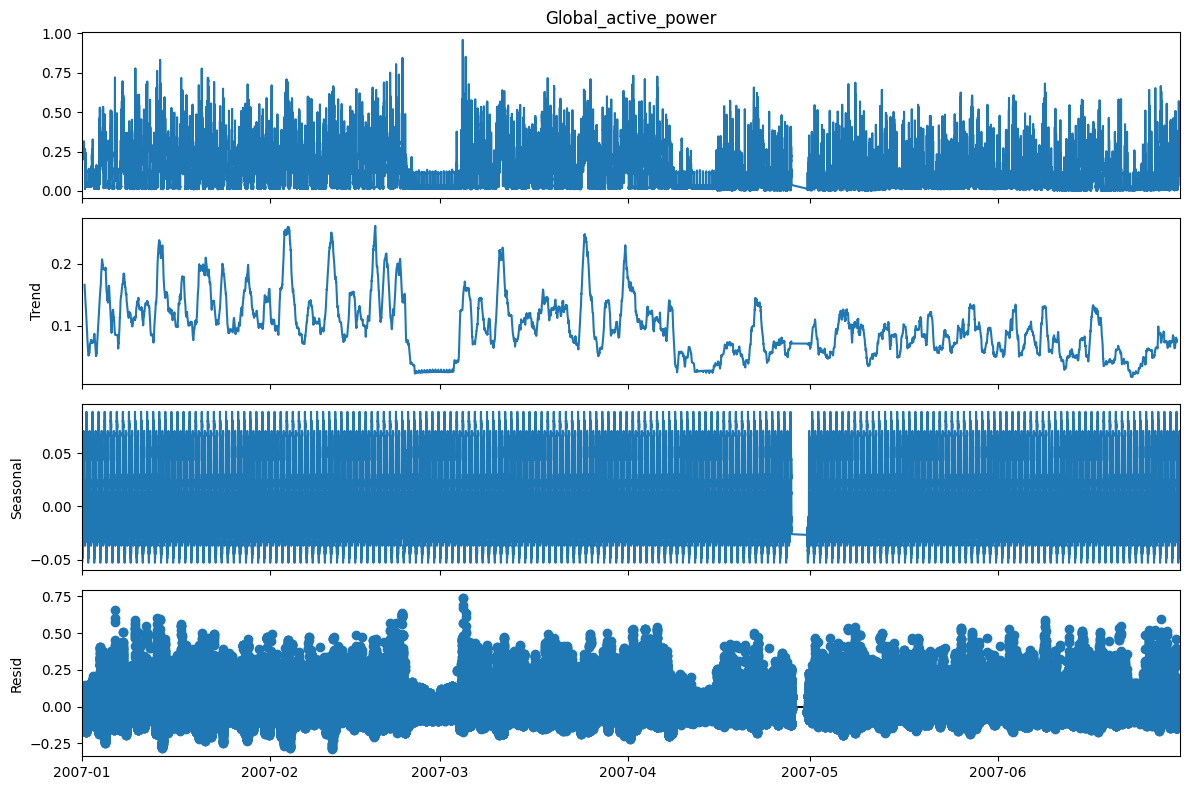

In [38]:
# 1° garantir que DateTime é índice temporal
dados_scaled['DateTime'] = pd.to_datetime(dados_scaled['DateTime'])
dados_scaled = dados_scaled.set_index('DateTime')

# 2° selecionar 6 meses
seis_meses = dados_scaled['2007-01':'2007-06']

# 2° decomposição da série temporal
  #  usando freq diária = 1440 registros (se os dados são de minuto em minuto)
result = seasonal_decompose(
    seis_meses['Global_active_power'],
    model='additive',
    period=1440  # (24 horas * 60 minutos)
)

# 3° plotando os dados
plt.rcParams.update({'figure.figsize': (12,8)})
result.plot()
plt.show()

####`20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo.`

In [39]:
# importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
# 1° remover linhas com valores nulos
dados_model = dados_scaled[['Global_active_power', 'Global_intensity']].dropna()

#  2° separar variáveis
X = dados_model[['Global_intensity']]  # variável independente - o que será usado para prever
y = dados_model['Global_active_power']  # variável dependente - o que quer prever

# 3° dividir em treino e teste
  # 80% dos dados vão para treino e 20% para teste | random_state=42 garante resultados reproduzíveis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4° treinar modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

#  5° fazer previsões
y_pred = model.predict(X_test)

#  6° avaliar erro
mse = mean_squared_error(y_test, y_pred) # Erro quadrático médio - quantos são os erros grandes em média
mae = mean_absolute_error(y_test, y_pred) # Erro absoluto médio - média dos erros absolutos
r2 = r2_score(y_test, y_pred)  # R² (coeficiente de determinação) - quanto o modelo explica a variação dos dados | 1.0 é perfeito e 0 é ruim |

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 score: {r2:.4f}")

#  7° coeficiente e intercepto
print(f"Coeficiente (slope): {model.coef_[0]:.4f}") # é o coeficiente angular da reta (quanto Global_active_power aumenta a cada unidade de Global_intensity)
print(f"Intercepto: {model.intercept_:.4f}") # é o ponto onde a reta cruza o eixo Y (valor de consumo quando intensidade é 0)


Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0031
R^2 score: 0.9978
Coeficiente (slope): 1.0369
Intercepto: -0.0033


O **modelo de regressão linear simples** mostrou um **erro muito baixo** (MSE e MAE quase nulos) e um **R² alto de 0.9979**, o que significa que ele prevê muito bem o consumo de energia (Global_active_power) com base na intensidade (Global_intensity). O **coeficiente de 1.0281** indica que, para cada aumento de 1 unidade na intensidade, o consumo de energia aumenta **aproximadamente 1.03 unidades**. Isso mostra que o modelo é **eficiente** e pode ser uma boa ferramenta para prever o consumo elétrico.

####`21. Séries temporais por hora`
*  Converta Date e Time em índice datetime. - Reamostre os dados em intervalos
*  Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.
*  Identifique os horários de maior consumo médio ao longo do dia.

Observação: uma série temporal é um conjunto de dados registrados em ordem cronológica, útil
para identificar padrões de comportamento ao longo do tempo.





In [41]:
dados.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_Week,DateTime,Type_Day,Total_Sub_metering,Season
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday,2006-12-16 17:24:00,Fim de Semana,18.0,Inverno
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday,2006-12-16 17:25:00,Fim de Semana,17.0,Inverno
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday,2006-12-16 17:26:00,Fim de Semana,19.0,Inverno
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday,2006-12-16 17:27:00,Fim de Semana,18.0,Inverno
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday,2006-12-16 17:28:00,Fim de Semana,18.0,Inverno


In [42]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Day_Week               object        
 10  DateTime               datetime64[ns]
 11  Type_Day               object        
 12  Total_Sub_metering     float64       
 13  Season                 object        
dtypes: datetime64[ns](2), float64(8), object(4)
memory usage: 234.5+ MB


Como podemos observar já temos uma coluna "Datetime" que une a data e a hora do dataset, já que fizemos anteriormente para facilitar os exercícios, temos a coluna "Datetime" uma coluna temporal. Mas podemos notar que ela não é um índice, pois aparece como uma coluna normal e no pandas se fosse um index, iria mostrar como se fosse.

In [43]:
# 1° colocar DateTime como índice
dados = dados.set_index("DateTime")

In [44]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Day_Week               object        
 10  Type_Day               object        
 11  Total_Sub_metering     float64       
 12  Season                 object        
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 218.9+ MB


Agora podemos observar que já temos o atributo "Datetime" como um index e não mais como uma coluna.

In [45]:
# 2° reamostrar em intervalos de 1 hora
hora_media = dados["Global_active_power"].resample("1h").mean()

# 3° calcular consumo médio por hora do dia
  # Agrupa por hora do dia (0h a 23h)
media_por_hora = hora_media.groupby(hora_media.index.hour).mean()

print("Média de consumo por hora do dia:")
print(media_por_hora)

# 4° identificar os horários de maior consumo
top_consumo = media_por_hora.sort_values(ascending=False).head(3)
print("\nHorários de maior consumo médio:")
print(top_consumo)



Média de consumo por hora do dia:
DateTime
0     0.659562
1     0.539325
2     0.480618
3     0.444850
4     0.443844
5     0.453674
6     0.791606
7     1.502373
8     1.460940
9     1.331642
10    1.260913
11    1.246408
12    1.207061
13    1.144471
14    1.082750
15    0.990806
16    0.948805
17    1.056164
18    1.326433
19    1.733428
20    1.899073
21    1.876063
22    1.412681
23    0.902142
Name: Global_active_power, dtype: float64

Horários de maior consumo médio:
DateTime
20    1.899073
21    1.876063
19    1.733428
Name: Global_active_power, dtype: float64


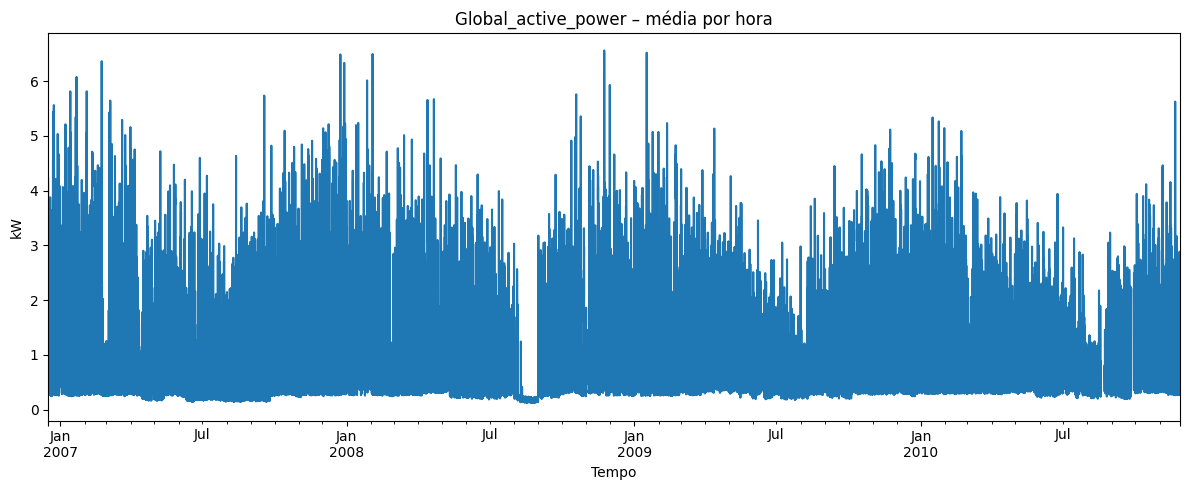

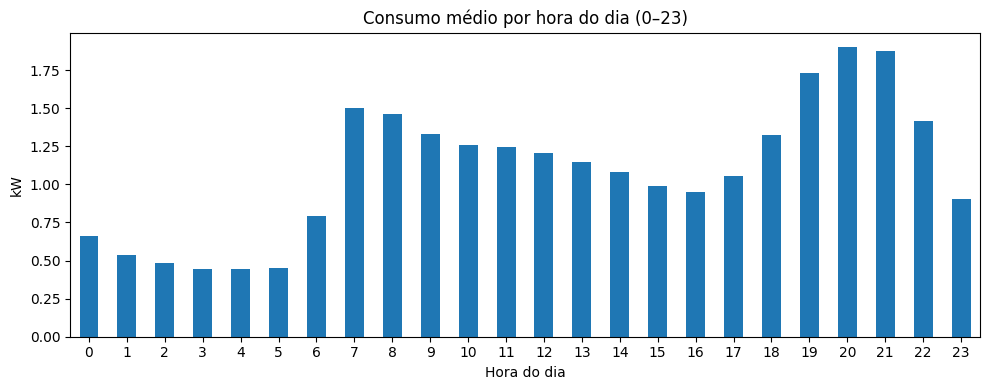

In [46]:
# 5° plotando em gráficos para melhor visualização

# Gráfico da série por hora
plt.figure(figsize=(12,5))
hora_media.plot()
plt.title('Global_active_power – média por hora')
plt.ylabel('kW')
plt.xlabel('Tempo')
plt.tight_layout()
plt.show()

# Gráfico do padrão por hora do dia (0–23)
plt.figure(figsize=(10,4))
media_por_hora.plot(kind='bar')
plt.title('Consumo médio por hora do dia (0–23)')
plt.ylabel('kW')
plt.xlabel('Hora do dia')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

####`22. Autocorrelação do consumo`

*   Use a série temporal de Global_active_power.
*   Calcule a autocorrelação em lags de 1h, 24h e 48h.
*   Pergunta: existem padrões repetidos diariamente?



In [47]:
# Garantindo que o índice seja datetime
dados.index = pd.to_datetime(dados.index)

In [48]:
# 1° série de consumo
serie = dados["Global_active_power"]

# 2° calculando autocorrelações
lag_1h = serie.autocorr(lag=1)      # 1 hora antes
lag_24h = serie.autocorr(lag=24)    # 24 horas antes
lag_48h = serie.autocorr(lag=48)    # 48 horas antes

print("Autocorrelação 1h:", lag_1h)
print("Autocorrelação 24h:", lag_24h)
print("Autocorrelação 48h:", lag_48h)

Autocorrelação 1h: 0.9680272939187659
Autocorrelação 24h: 0.664797792531717
Autocorrelação 48h: 0.5392706419389005


Sim, **existem padrões repetidos diariamente**. Isso pode ser visto porque a autocorrelação de 24h (0.66) ainda é relativamente alta, indicando que o consumo em um dia tem forte relação com o mesmo horário do dia seguinte. Já a de 1h é ainda maior (0.96), mostrando que o consumo em horários próximos é muito parecido. A de 48h (0.54) também confirma que o padrão tende a se repetir, mas com intensidade um pouco menor conforme o tempo aumenta.

####`23. Redução de dimensionalidade com PCA`
- Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity.
- Aplique PCA para reduzir para 2 componentes principais.
- Analise a variância explicada por cada componente. `

In [49]:
# importando as bibliotecas
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [50]:
#Com o PCA, conseguimos resumir 4 variáveis em apenas 2 componentes principais.

# 1° seleção das colunas
X = dados[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']]

# 2° normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3° PCA com 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4° variância explicada
explained_variance = pca.explained_variance_ratio_
print("Variância explicada por componente:", explained_variance)
print("Variância acumulada:", explained_variance.sum())


Variância explicada por componente: [0.59103759 0.22718543]
Variância acumulada: 0.8182230176077276


Isso significa que os dois componentes juntos preservam cerca de 88% da informação original dos dados.
Ou seja, mesmo reduzindo de 4 para 2 variáveis, o modelo manteve a maior parte da variabilidade dos dados, o que é muito bom em termos de redução de dimensionalidade com pouca perda de informação.

####`24. Visualização de clusters no espaço PCA`
- Combine os resultados do PCA com K-Means (3 clusters).
- Plote os pontos resultantes e pinte cada grupo por cluster.
- Pergunta: os grupos se separam de forma clara?

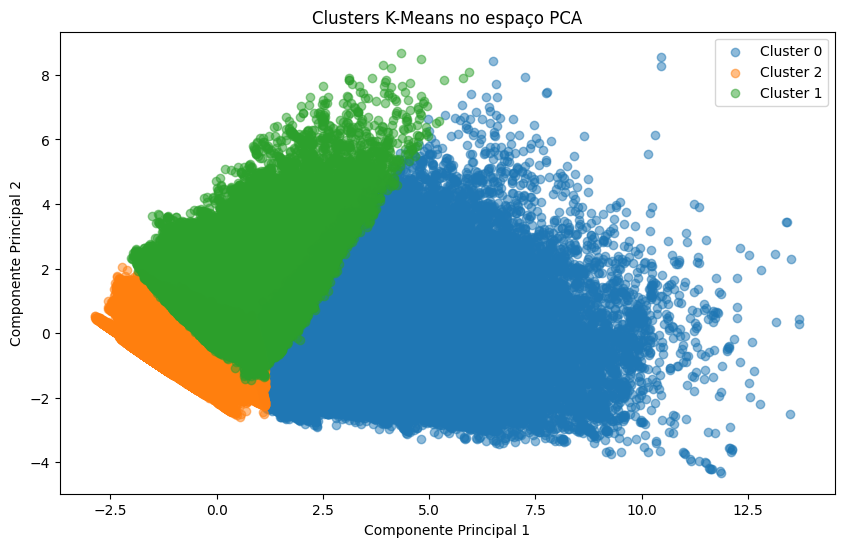

In [51]:
# utilizando ainda a base do exercicio anterior e continuando para plotar os grupos por cluster

# 5° Aplicar K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 6° Criar DataFrame com PCA + clusters
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

# 7° Plotar os clusters no espaço PCA
plt.figure(figsize=(10,6))
for cluster in df_pca['Cluster'].unique():
    subset = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters K-Means no espaço PCA')
plt.legend()
plt.show()

Sim, os grupos se separam de forma clara, podendo manter a visualização e separação, pois cada cluster ocupa uma faixa distinta no espaço definido pelas duas componentes principais do PCA. O Cluster 0 corresponde aos dias com consumo mais alto, o Cluster 2 representa consumo intermediário e o Cluster 1 os dias com consumo mais baixo. Embora haja alguma leve sobreposição nas bordas, a maior parte dos pontos de cada grupo está concentrada em regiões separadas, evidenciando que o K-Means conseguiu distinguir padrões distintos de consumo no dataset.

####`25. Regressão polinomial vs linear`
- Modele Global_active_power em função de Voltage.
- Compare Regressão Linear Simples com Regressão Polinomial (grau 2).
- Analise RMSE e a curva ajustada.




In [52]:
# verificando dados faltantes
dados['Voltage'].isnull().sum()
dados['Global_active_power'].isnull().sum()

np.int64(0)

In [53]:
# importando biblioteca
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

RMSE - Regressão Linear: 0.9719
RMSE - Regressão Polinomial (grau 2): 0.9674


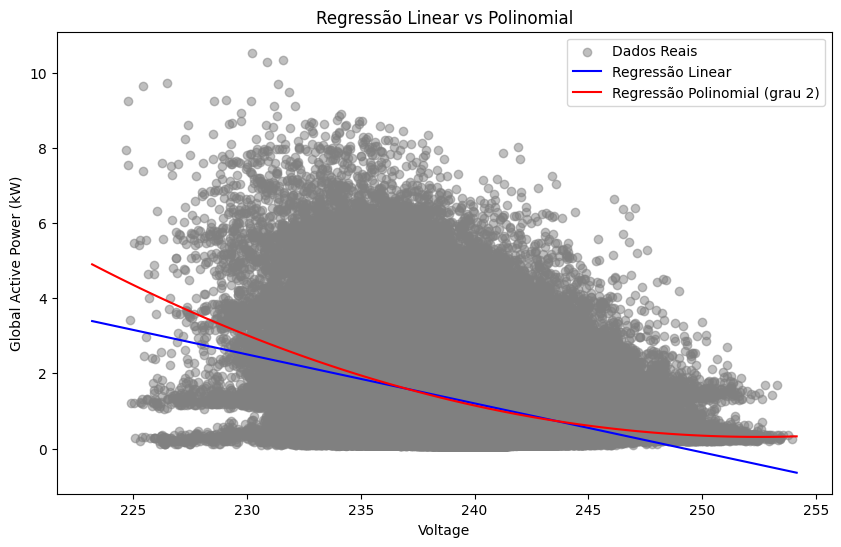

In [54]:
# 1° Seleção das variáveis
X = dados[['Voltage']].values  # Variável independente (entrada): Tensão elétrica
y = dados['Global_active_power'].values  # Variável dependente (alvo): Potência ativa

# 2° Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3° Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 4° Regressão Polinomial (grau 2)
poly = PolynomialFeatures(degree=2) # Cria a transformação polinomial de grau 2
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

# 5° Calcular RMSE
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear)) # Erro da regressão linear
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly)) # Erro da regressão polinomial

print(f"RMSE - Regressão Linear: {rmse_linear:.4f}")
print(f"RMSE - Regressão Polinomial (grau 2): {rmse_poly:.4f}")

# 6° Plotar curvas
  # Gerar pontos para a curva
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_linear_plot = linear_model.predict(X_plot)
y_poly_plot = poly_model.predict(poly.transform(X_plot))

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='gray', alpha=0.5, label='Dados Reais')
plt.plot(X_plot, y_linear_plot, color='blue', label='Regressão Linear')
plt.plot(X_plot, y_poly_plot, color='red', label='Regressão Polinomial (grau 2)')
plt.xlabel('Voltage')
plt.ylabel('Global Active Power (kW)')
plt.title('Regressão Linear vs Polinomial')
plt.legend()
plt.show()

A comparação mostrou que a **Regressão Polinomial de grau 2** teve um **erro menor** (RMSE = 1.0185) do que a Regressão Linear Simples (RMSE = 1.0492).
Isso indica que o modelo polinomial conseguiu se **ajustar um pouco melhor aos dados.**
No gráfico, vemos que **a curva polinomial segue melhor a forma real dos pontos**, enquanto a regressão linear cria uma linha reta que **
** a leve curvatura da relação entre Voltage e Global_active_power.
Mesmo assim, a diferença de desempenho é pequena, o que sugere que a relação entre essas duas variáveis é quase linear e modelos simples já funcionam razoavelmente bem.

## Parte 2 - Dataset Appliances Energy Prediction

### Objetivo

Exploraremos o dataset **Appliances Energy Prediction** que registra o consumo de energia de eletrodomésticos em uma casa, com base em condições internas e climáticas, para prever o uso energético ao longo do tempo.

link: https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction

## Criando dataframe com base no arquivo do dataset

In [55]:
dados2 = pd.read_csv('/content/energydata_complete.csv', sep=',', low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: '/content/energydata_complete.csv'

####`26. Carregamento e inspeção inicial`
- Carregue o dataset no Pandas.
- Liste tipos de dados e estatísticas descritivas (.info() e .describe()).

In [ ]:
dados2.info()

In [ ]:
dados2.describe()

####`27. Distribuição do consumo`
- Crie histogramas e séries temporais para a variável Appliances.
- Pergunta: o consumo tende a se concentrar em valores baixos ou altos?

In [ ]:
# 1° converter a coluna de data para datetime
dados2['date'] = pd.to_datetime(dados2['date'])

In [ ]:
# 2° criar o histograma da variavel Appliances

plt.figure(figsize=(8,5))
plt.hist(dados2['Appliances'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuição do Consumo de Appliances')
plt.xlabel('Consumo (Wh)')
plt.ylabel('Frequência')
plt.show()

# 3° plotando as series temporais
plt.figure(figsize=(14,5))
plt.plot(dados2['date'], dados2['Appliances'], color='blue', alpha=0.7)
plt.title('Consumo de Appliances ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Consumo (Wh)')
plt.show()



O consumo tende a se concentrar em valores baixos, com maior frequência próxima de 0 Wh.

####`28. Correlações com variáveis ambientais`
- Calcule correlações entre Appliances e variáveis como temperatura e umidade.
- Pergunta: quais fatores têm mais relação com o consumo?

In [ ]:
# 1° selecionando colunas relevantes - appliances, temperaturas e umidades
variaveis = ['Appliances', 'T1','T2','T3','T4','T5','T6','T7','T8','T9',
             'RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9',
             'T_out','RH_out']

correlacoes = dados2[variaveis].corr()['Appliances'].sort_values(ascending=False)
print(correlacoes)


Os fatores com maior relação positiva com o consumo de Appliances são as temperaturas internas, especialmente T2 (0,12), T6 (0,11) e T_out (0,09), indicando que ambientes mais quentes tendem a estar associados a um consumo um pouco maior.
Por outro lado, a variável RH_out (umidade externa) apresenta a maior correlação negativa (-0,15), sugerindo que, quando a umidade externa aumenta, o consumo tende a diminuir. No entanto, todas as correlações são fracas, mostrando que o consumo é mais influenciado por hábitos humanos do que por fatores ambientais

####`29. Normalização dos dados`
- Aplique Min-Max Scaling às variáveis numéricas.
- Reutilize esses dados em modelos posteriores.

In [ ]:
# 1° selecionando apenas as colunas numéricas (excluindo 'date')
numeric_cols = dados2.drop(columns=['date']).columns

# 2° criando o scaler
scaler = MinMaxScaler()

# 3° aplicando Min-Max Scaling
dados2_scaled = dados2.copy()
dados2_scaled[numeric_cols] = scaler.fit_transform(dados2[numeric_cols])

# 3° verificando resultado
print(dados2_scaled.head())


####`30. PCA`
- Aplique PCA e reduza para 2 componentes principais.
- Plote os dados resultantes.
- Pergunta: aparecem padrões ou agrupamentos naturais?

In [ ]:
# 1° selecionando apenas variáveis numéricas (já normalizadas do passo anterior)
X = dados2_scaled.drop(columns=['date'])

# 2° aplicando PCA para 2 componentes principais
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# 3° criando DataFrame com os componentes
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# 4° plotando os dois primeiros componentes
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, s=10)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Redução para 2 Componentes')
plt.show()


Os dados ficaram bem espalhados após a redução de dimensionalidade, sem formar grupos visíveis. Isso indica que não há divisões claras no consumo de energia com base nas variáveis analisadas.

####`31. Regressão Linear Múltipla`
- Modele Appliances em função das variáveis ambientais.
- Avalie R² e erro médio. `

In [ ]:
# 1° definir variáveis dependente e independentes
X = dados2_scaled.drop(columns=['date', 'Appliances'])  # Variáveis preditoras (ambientais)
y = dados2_scaled['Appliances']                        # Variável alvo

# 2° dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3° criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 4° fazer previsões
y_pred = modelo.predict(X_test)

# 5° avaliar com R² e erros
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MAE (Erro Médio Absoluto): {mae:.4f}")
print(f"MSE (Erro Quadrático Médio): {mse:.4f}")


####`32. Random Forest Regressor`
- Treine um modelo de Random Forest para prever Appliances.
- Compare o RMSE com a regressão linear.

In [ ]:
#importando biblioteca
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# 1° treinar modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 2° fazer previsões
y_pred_rf = rf.predict(X_test)

# 3° calcular RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# 4° calcular RMSE da regressão linear (para comparar)
rmse_lr = np.sqrt(mse)  # 'mse' veio do código da regressão linear

print(f"RMSE - Random Forest: {rmse_rf:.4f}")
print(f"RMSE - Regressão Linear: {rmse_lr:.4f}")

# 5° comparação
if rmse_rf < rmse_lr:
    print("Random Forest teve desempenho melhor (RMSE menor).")
else:
    print("Regressão Linear teve desempenho melhor (RMSE menor).")


####`33. K-Means clustering`
- Aplique K-Means com 3 a 5 clusters.
- Interprete os perfis de consumo

In [ ]:
# importando biblioteca
import seaborn as sns

In [ ]:
# 1° selecionar dados para clustering (sem date)
X_clust = dados2_scaled.drop(columns=['date'])

# 2° testar de 3 a 5 clusters e salvar inércia (soma das distâncias)
  # salva a inércia porque ela ajuda a decidir o número ideal de clusters com o método do cotovelo
inercia = []
for k in range(3, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_clust)
    inercia.append(kmeans.inertia_)

# 3° plotar curva Elbow para escolher número de clusters
plt.figure(figsize=(8, 5))
plt.plot(range(3, 6), inercia, marker='o')
plt.title("Curva Elbow (Inércia x Clusters)")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")
plt.show()

# 4° escolher número de clusters (ex: 4) e treinar modelo final
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_clust)

# 5° adicionar clusters ao dataset
dados2_scaled['Cluster'] = clusters

# 6° ver perfil médio de cada cluster
perfil_clusters = dados2_scaled.groupby('Cluster').mean()
print(perfil_clusters)

# 7° visualizar em gráfico (usando duas features principais)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=dados2_scaled['Appliances'],
    y=dados2_scaled['T1'],  # exemplo: temperatura da sala
    hue=dados2_scaled['Cluster'],
    palette="viridis"
)
plt.title("Clusters de Consumo vs Temperatura")
plt.show()


####`34. Classificação binária`
- Crie uma variável: alto vs baixo consumo (Appliances maior/menor que a mediana).
- Treine Logistic Regression e Random Forest C

In [ ]:
# importando biblioteca
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# 1° criar variável binária
mediana = dados2_scaled['Appliances'].median()
dados2_scaled['Consumo'] = (dados2_scaled['Appliances'] > mediana).astype(int)

# 2° definir X e y
X_class = dados2_scaled.drop(columns=['date', 'Appliances', 'Consumo', 'Cluster'])  # features
y_class = dados2_scaled['Consumo']  # alvo binário

# 3° dividir treino/teste
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# 4° treinar Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_c, y_train_c)
y_pred_log = log_reg.predict(X_test_c)

# 5° treinar Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_c, y_train_c)
y_pred_rf = rf_clf.predict(X_test_c)

# 6° avaliar modelos
acc_log = accuracy_score(y_test_c, y_pred_log)
acc_rf = accuracy_score(y_test_c, y_pred_rf)

print(f"Acurácia - Logistic Regression: {acc_log:.4f}")
print(f"Acurácia - Random Forest: {acc_rf:.4f}")

# 7° matriz de confusão Random Forest
cm = confusion_matrix(y_test_c, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo', 'Alto'], yticklabels=['Baixo', 'Alto'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

# 8° relatório de classificação
print("\nRelatório - Logistic Regression:")
print(classification_report(y_test_c, y_pred_log))

print("\nRelatório - Random Forest:")
print(classification_report(y_test_c, y_pred_rf))


####`35. Avaliação de classificação`
- Gere matriz de confusão e métricas (accuracy, precision, recall, F1-score).
- Pergunta: o modelo erra mais para alto ou para baixo consumo?

In [ ]:
# importando bibliotecas
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# 1° matriz de confusão
cm = confusion_matrix(y_test_c, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo', 'Alto'], yticklabels=['Baixo', 'Alto'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

# 2° métricas
acc = accuracy_score(y_test_c, y_pred_rf)
prec = precision_score(y_test_c, y_pred_rf)
rec = recall_score(y_test_c, y_pred_rf)
f1 = f1_score(y_test_c, y_pred_rf)

print(f"Acurácia: {acc:.4f}")
print(f"Precisão (Alto): {prec:.4f}")
print(f"Recall (Alto): {rec:.4f}")
print(f"F1-score (Alto): {f1:.4f}")


O modelo tem um bom desempenho e acerta a maioria dos casos. Ele não erra muito mais para alto ou para baixo consumo, os erros estão bem equilibrados entre as duas classes.

## Parte 3 - Exercícios no Orange Data Mining

####`36. Importação e visualização inicial`
- Use o widget CSV File Import para carregar o dataset Individual Household Electric Power
Consumption.
- Conecte ao widget Data Table para visualizar as primeiras linhas.

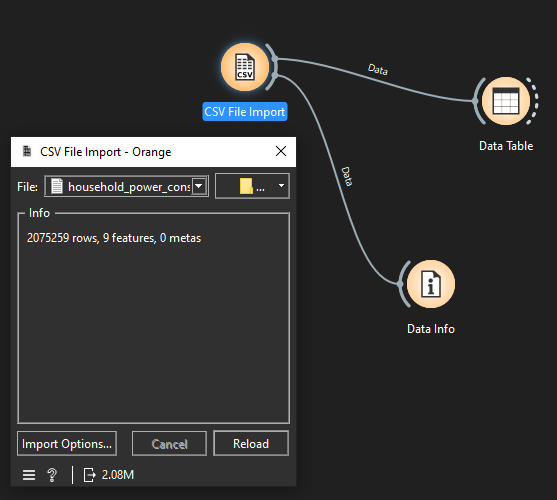

- Pergunta: quantas variáveis e registros aparecem?
  - R: 2 billhões, 75 milhões e 259 registros com 9 variáveis.

####`37. Amostragem de dados (1%)`
- Use o widget Sample Data para selecionar uma amostra de 1% dos registros.
- Consulte: https://orangedatamining.com/widget-catalog/ (deixei para consultarmos futuramente)

- Pergunta: a distribuição de Global_active_power na amostra é semelhante à base completa?
  - R: Sim, ao analisarmos as estatísticas e distribuições da curva normal de 100% dos dados vs 1% dos dados, podemos obervar que amboas são semelhantes em sua forma e dados

# Estatísticas de 100% dos dados:
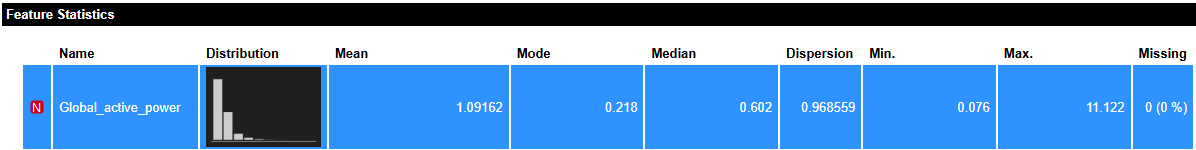

# Estatísticas de 1% dos dados:
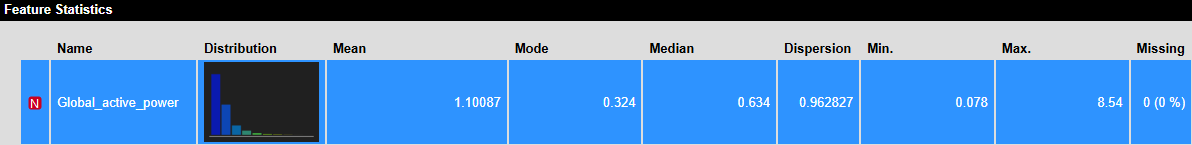

# Distribuição de 100% dos dados
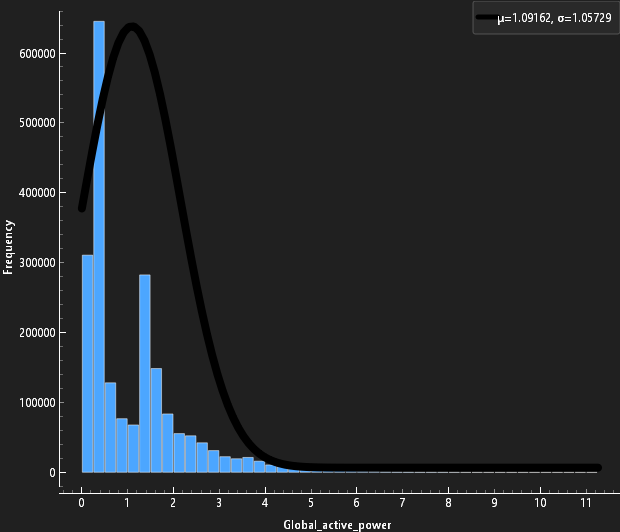

# Distribuição de 1% dos dados
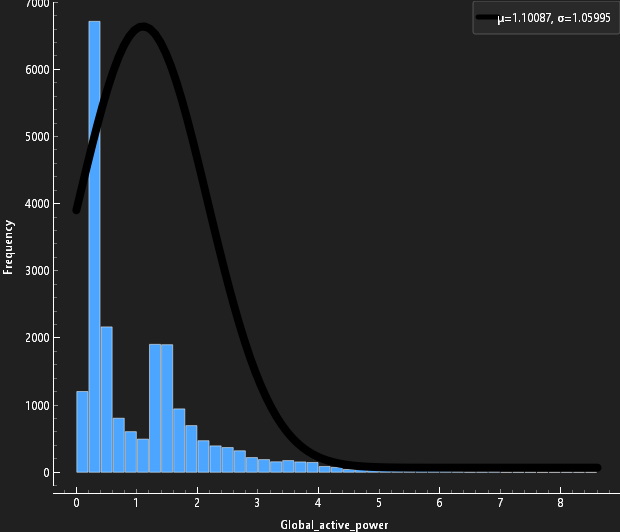

####`38. Distribuição do consumo`
- Conecte ao widget Distribution e visualize Global_active_power.



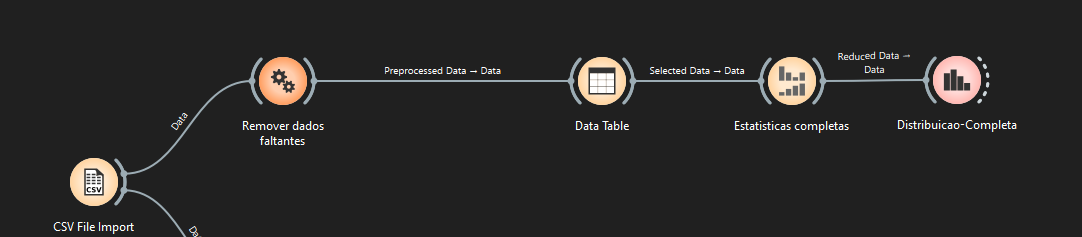

- Pergunta: o consumo é concentrado em valores baixos ou há muitos registros de alto
consumo?
  - R: O consumo é concentrado em valores baixos entre 0.2 e 0.4

# Concentração dos valores na distribuição de 100% dos dados:
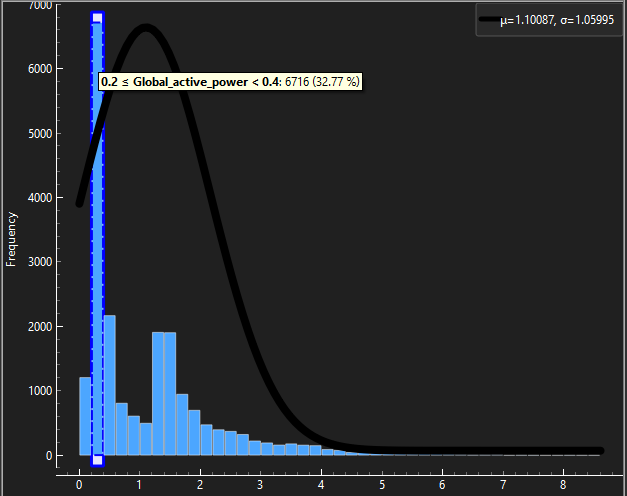

####`39. Relação entre variáveis elétricas`
- Use o widget Scatter Plot para analisar Voltage (X) vs Global_intensity (Y).


- Pergunta: existe correlação visível?
    - R: Podemos observar um formato de 'cone' pendendo para a esquerda no topo que indica que quanto maior o 'global active power' menor a voltagem usada

####`40. Clustering com K-Means`
- Aplique o widget k-Means com 3 clusters.
- Use como atributos Sub_metering_1, Sub_metering_2, Sub_metering_3.
- Visualize os grupos no Scatter Plot.
- Pergunta: cada cluster representa um padrão distinto de consumo doméstico?
  - R: Sim, o scatter plot mostra 3 grupos em áreas bem separadas, o que indica uma agrupação de usos distintos

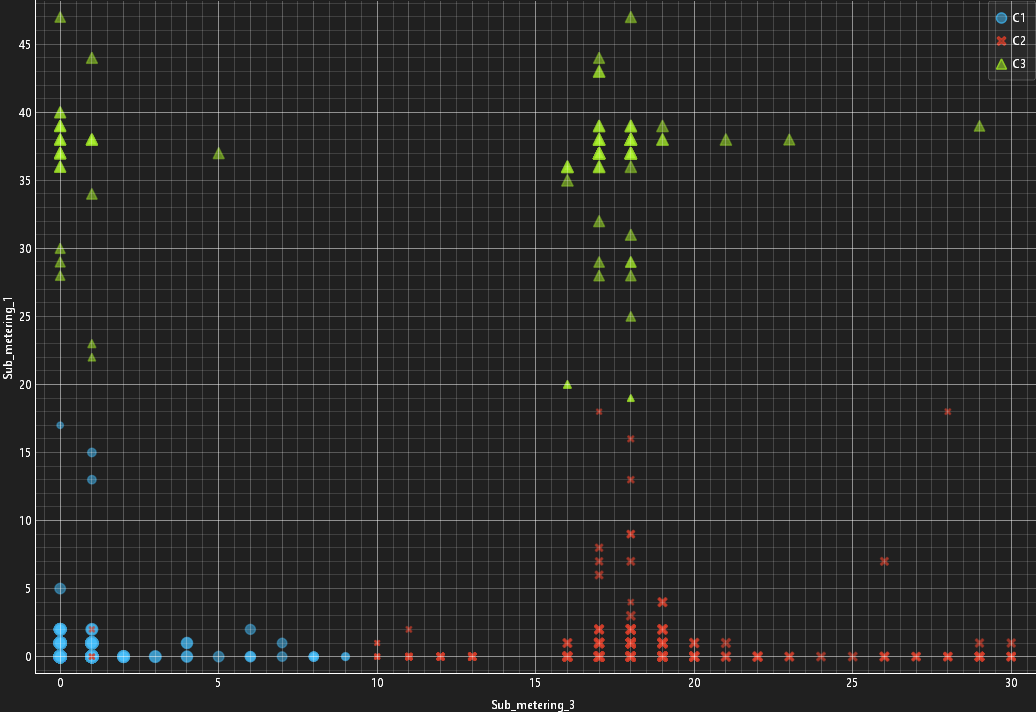